# Entregable 3 (RNN)
Por `Carlos Sánchez Polo`

Asignatura Deep Learning

## Dataset 1

Escoger uno de los tres datasets (datos reales no preparados por Keras o TensorFlow) y realizar lo que
se especifique para cada uno de ellos.

**Dataset1**
* RNN para clasificación
* Pensar como adaptar los datos (raw) para que sean secuencias de datos. Utilizar algún modelo recurrente para clasificar cada secuencia en una de las dos categorı́as.

In [1]:
import os
import pandas as pd

In [2]:
path_selec = "dataset1/"

file_paths = {
    path_selec + "TGFs_NO_BGO.txt": [],
    path_selec + "TGFs_NO_CZT.txt": [],
    path_selec + "TGFs_SI_BGO.txt": [],
    path_selec + "TGFs_SI_CZT.txt": []
}

for file_name in file_paths.keys():
    with open(file_name, "r") as file:
        for line in file:
            file_paths[file_name].append(line.strip())

TGFs_NO_BGO_list = file_paths[path_selec + "TGFs_NO_BGO.txt"]
TGFs_NO_CZT_list = file_paths[path_selec + "TGFs_NO_CZT.txt"]
TGFs_SI_BGO_list = file_paths[path_selec + "TGFs_SI_BGO.txt"]
TGFs_SI_CZT_list = file_paths[path_selec + "TGFs_SI_CZT.txt"]


In [3]:
list_SiNo = [TGFs_NO_BGO_list,
             TGFs_NO_CZT_list,
             TGFs_SI_BGO_list,
             TGFs_SI_CZT_list]

trigers_T = []
for lista in list_SiNo:
    trigers_T.extend(lista)


In [4]:
path_output = "dataset1/Output_counts"
archivos_output = os.listdir(path_output)

trigers_T_set = set(trigers_T)
archivos_output_set = set(archivos_output)

trigers_F =[]
trigers_F_set = archivos_output_set - trigers_T_set
trigers_F = list(trigers_F_set)


In [5]:
BGO_lista = [archivo for archivo in archivos_output if "BGO" in archivo]
CZT_lista = [archivo for archivo in archivos_output if "CZT" in archivo]

Ya tenemos buena parte de los archivos guardados en memoria de forma relativamente estructurada.

La mayoría de los datos son del detector BGO. Vamos a centrarnos en ese tipo de detector. Tenemos 279 entradas de ese tipo. Hay 69 triggers verdaderos de ese detector y 59 triggers falsos (no corresponden a triggers de emisiones de rayos gamma)

In [12]:
# Directorio donde se encuentran los archivos
dir_path = 'dataset1/Output_counts/'

ejemplo = pd.read_csv('dataset1/Output_counts/' + archivos_output[11], sep='\\s+', header=None, usecols=[0, 4])


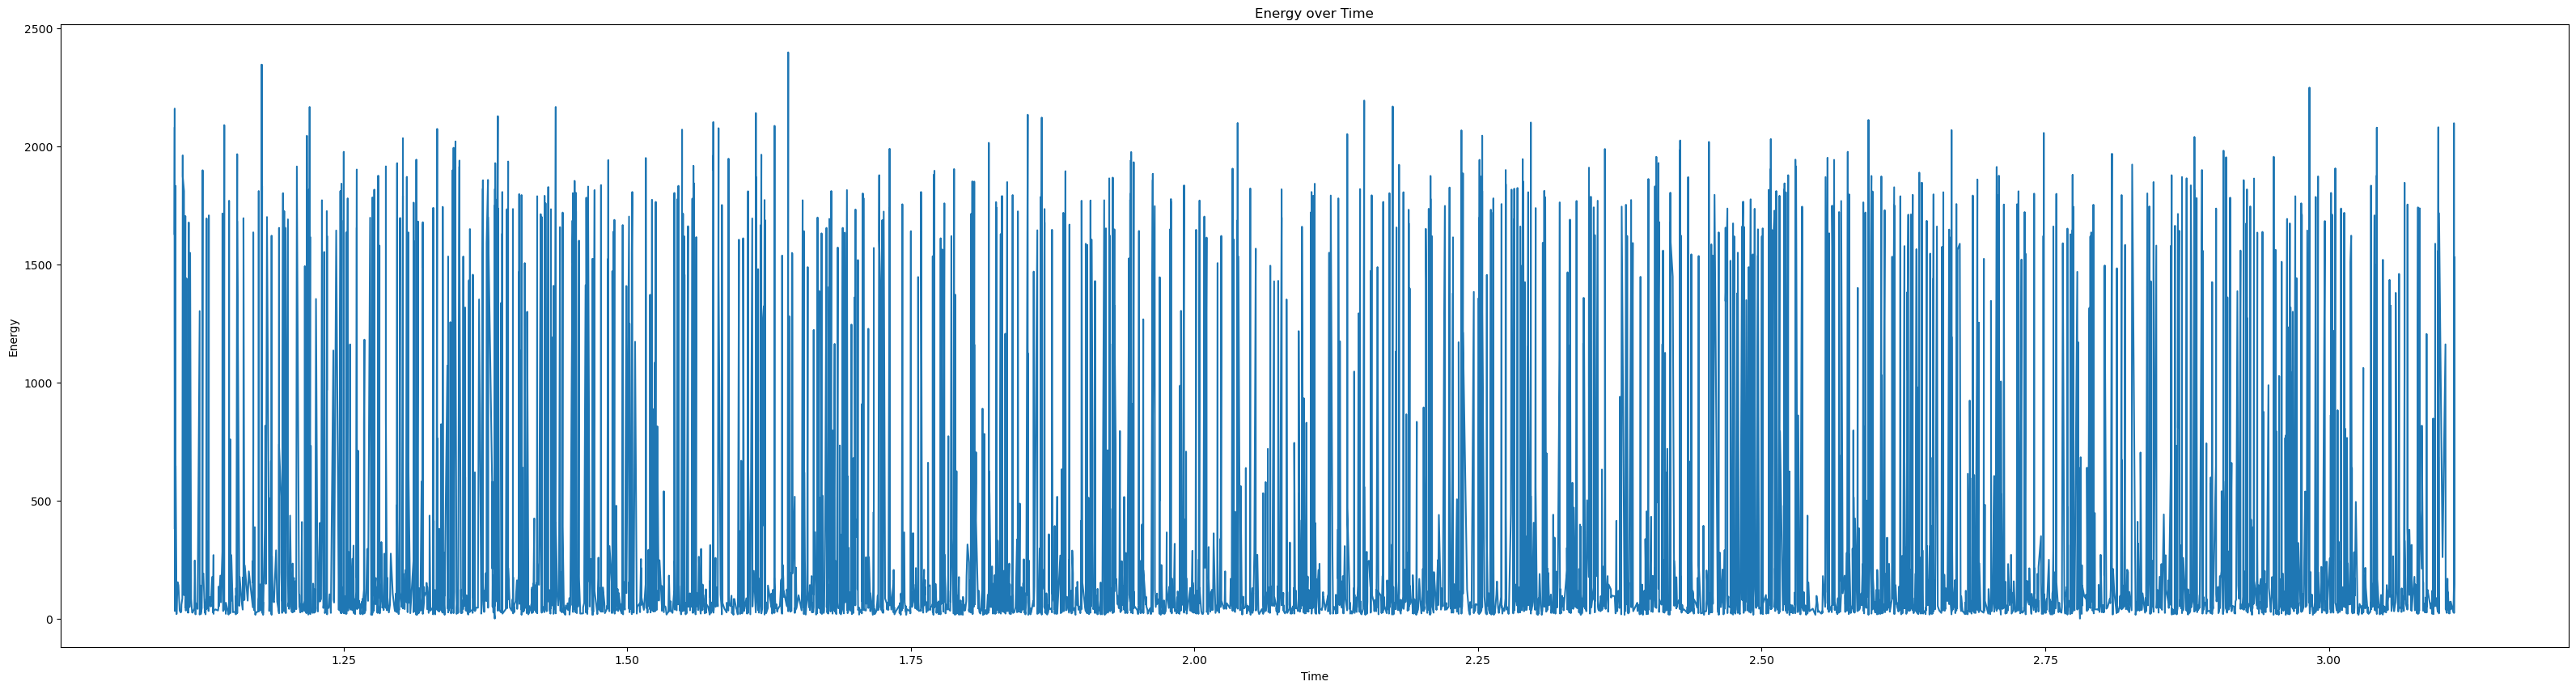

In [21]:
import matplotlib.pyplot as plt

# Asegúrate de que los datos estén en formato numérico
ejemplo[0] = pd.to_numeric(ejemplo[0], errors='coerce')
ejemplo[4] = pd.to_numeric(ejemplo[4], errors='coerce')

plt.figure(figsize=(40, 10))
plt.plot(ejemplo[0], ejemplo[4])
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time')
plt.show()

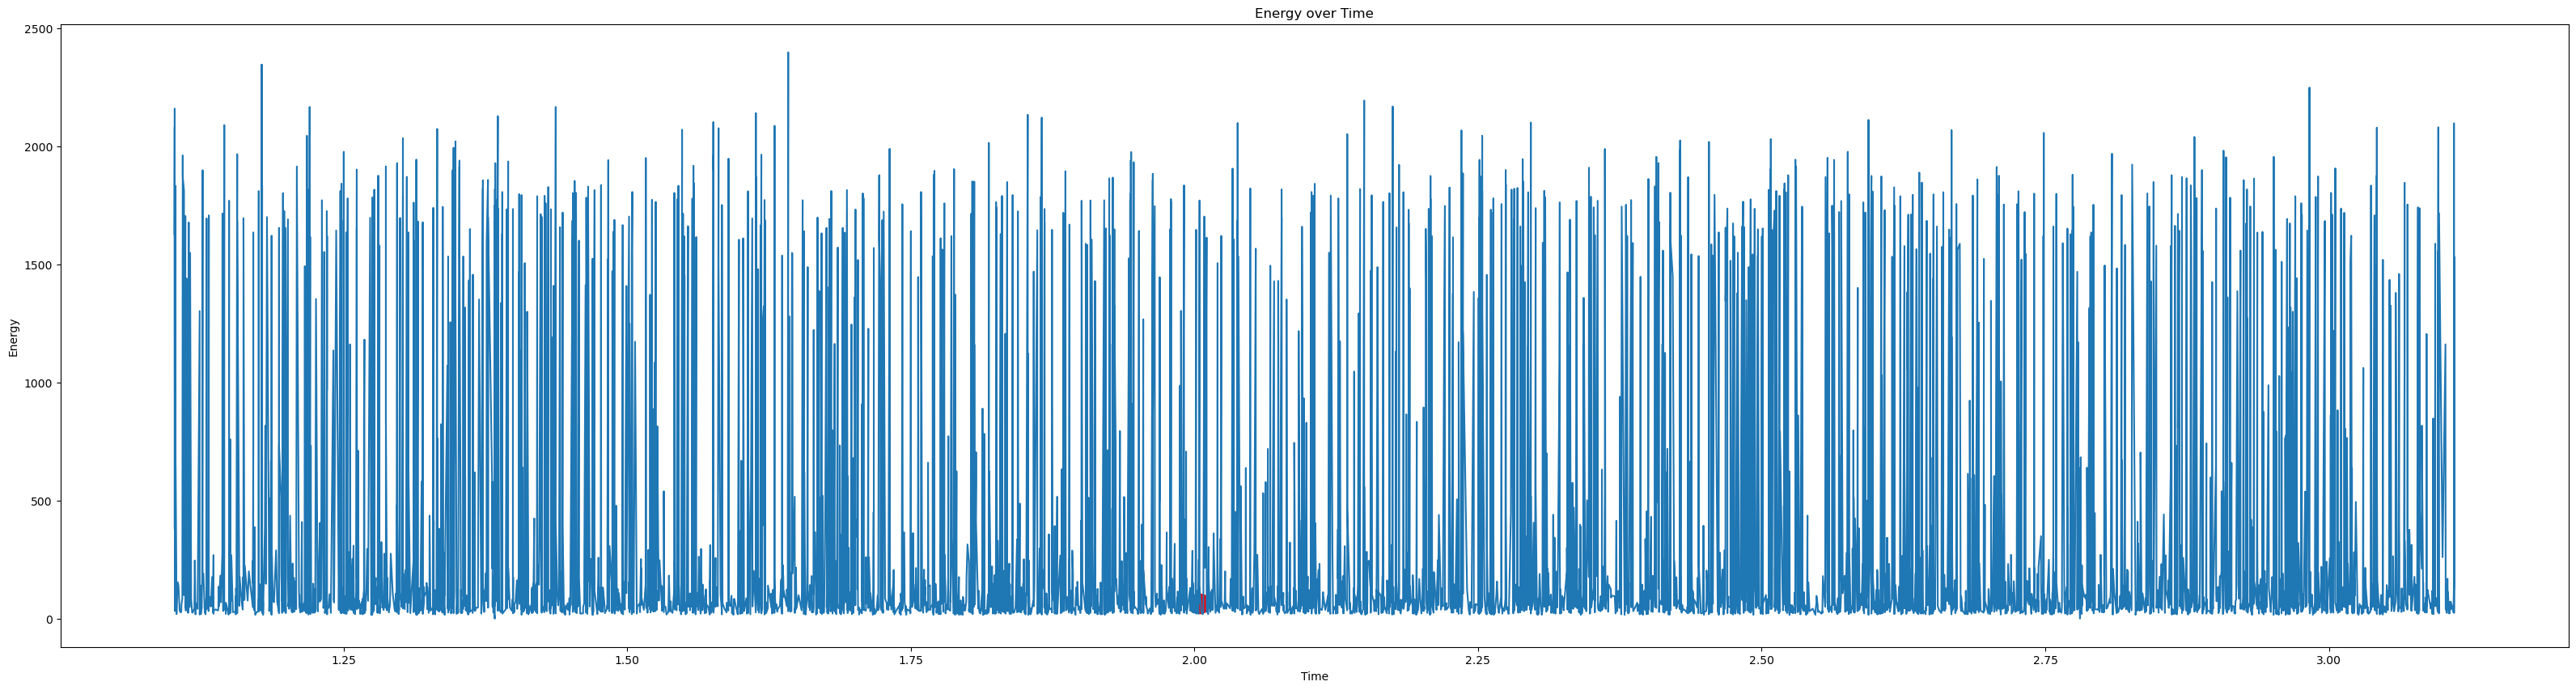

In [19]:
# Time point to highlight
highlight_time = 2.004588e+00

# Find the time value closest to highlight_time
closest_time = ejemplo.iloc[(ejemplo[0]-highlight_time).abs().argsort()[:1]]

# Find the energy value at the closest_time
highlight_energy = closest_time[4].values[0]

plt.figure(figsize=(40, 10))
plt.plot(ejemplo[0], ejemplo[4])
plt.scatter(closest_time[0], highlight_energy, color='red', s=300)  # Add the highlighted point
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time')
plt.show()

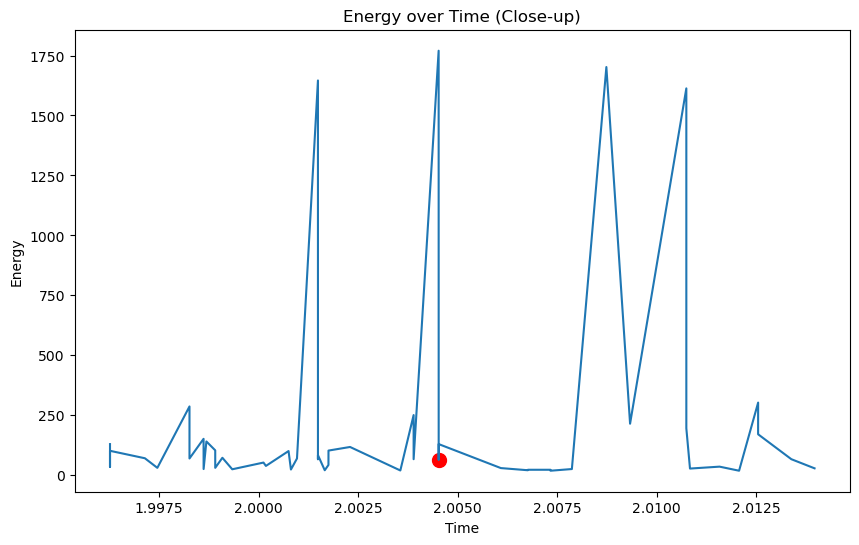

In [20]:
# Define a time window around the highlighted point
time_window = 0.01  # Adjust this value to change the size of the time window

# Select the data within the time window
subset = ejemplo[(ejemplo[0] >= highlight_time - time_window) & (ejemplo[0] <= highlight_time + time_window)]

plt.figure(figsize=(10, 6))
plt.plot(subset[0], subset[4])
plt.scatter(closest_time[0], highlight_energy, color='red', s=100)  # Add the highlighted point
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time (Close-up)')
plt.show()

In [22]:
# Directorio donde se encuentran los archivos
dir_path = 'dataset1/Output_counts/'

ejemplo2 = pd.read_csv('dataset1/Output_counts/' + archivos_output[184], sep='\\s+', header=None, usecols=[0, 4])


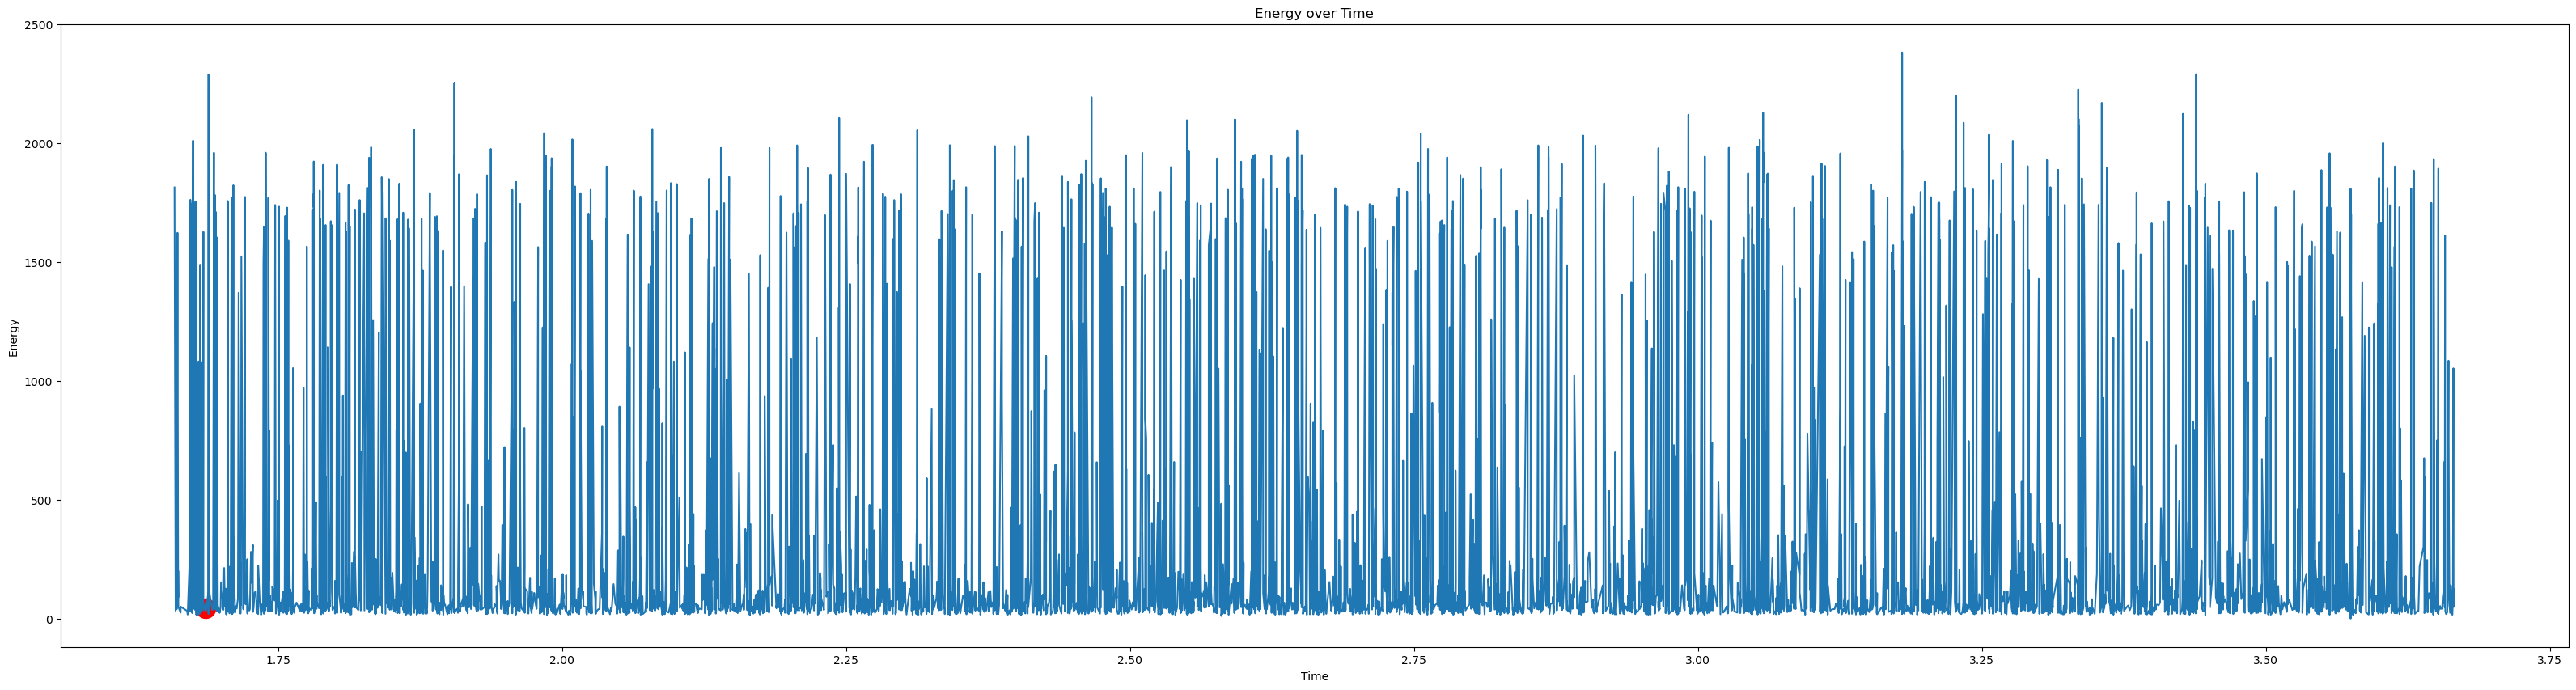

In [24]:
# Time point to highlight
highlight_time = 1.686612

# Find the time value closest to highlight_time
closest_time2 = ejemplo2.iloc[(ejemplo2[0]-highlight_time).abs().argsort()[:1]]

# Find the energy value at the closest_time
highlight_energy2 = closest_time2[4].values[0]

plt.figure(figsize=(40, 10))
plt.plot(ejemplo2[0], ejemplo2[4])
plt.scatter(closest_time[0], highlight_energy, color='red', s=300)  # Add the highlighted point
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time')
plt.show()

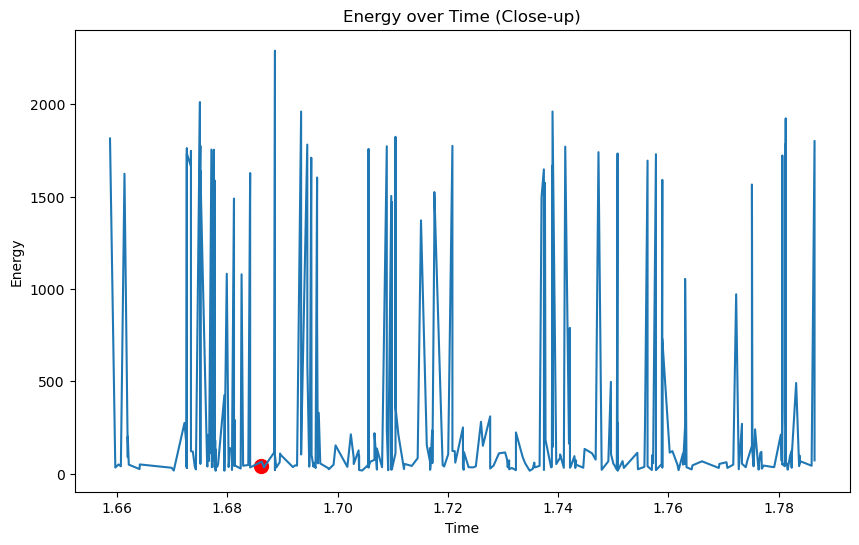

In [26]:
# Define a time window around the highlighted point
time_window = 0.1  # Adjust this value to change the size of the time window

# Select the data within the time window
subset = ejemplo2[(ejemplo2[0] >= highlight_time - time_window) & (ejemplo2[0] <= highlight_time + time_window)]

plt.figure(figsize=(10, 6))
plt.plot(subset[0], subset[4])
plt.scatter(closest_time[0], highlight_energy, color='red', s=100)  # Add the highlighted point
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time (Close-up)')
plt.show()